### What Are Embeddings?
Think of embeddings as a way to translate words into a language that computers understand - numbers!

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Simplified 2D example (real embeddings have hundreds of dimensions)
word_embeddings = {
    "cat": [0.8, 0.6],
    "kitten": [0.75, 0.65],
    "dog": [0.7, 0.3],
    "puppy": [0.65, 0.35],
    "car": [-0.5, 0.2],
    "truck": [-0.45, 0.15]
}

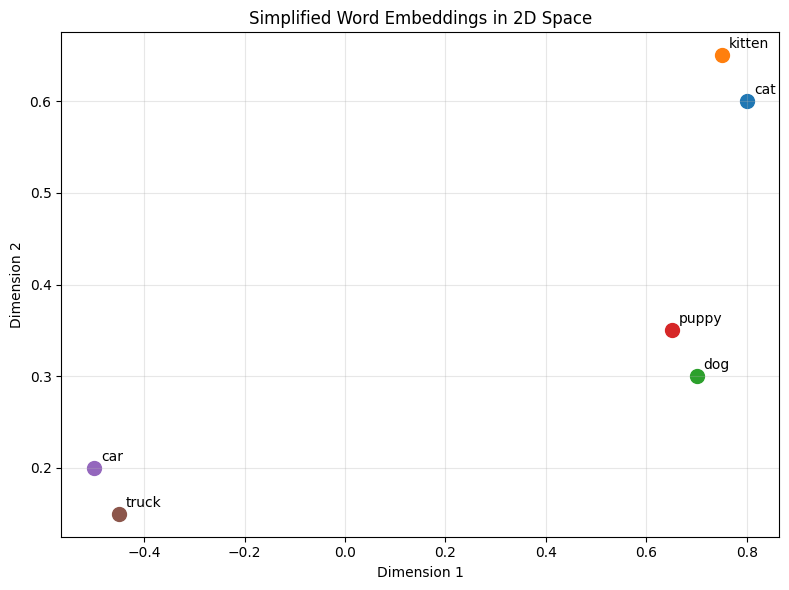

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), xytext=(5, 5), 
                textcoords='offset points')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('Simplified Word Embeddings in 2D Space')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Measuring Similarity

In [4]:
def cosine_similarity(vec1, vec2):
    """
    Cosine similarity measures the angle between two vectors.
    - Result close to 1: Very similar
    - Result close to 0: Not related
    - Result close to -1: Opposite meanings
    """

    dot_product=np.dot(vec1,vec2)
    norm_a=np.linalg.norm(vec1)
    norm_b=np.linalg.norm(vec2)
    return dot_product/(norm_a * norm_b)



In [5]:
# Example
cat_vector = [0.8, 0.6, 0.3]
kitten_vector = [0.75, 0.65, 0.35]
car_vector = [-0.5, 0.2, 0.1]

cat_kitten_similarity=cosine_similarity(cat_vector,kitten_vector)
print(cat_kitten_similarity)

0.9966186334192181


In [6]:
cosine_similarity(cat_vector,car_vector)

np.float64(-0.43718588548916804)

### Creating Your First Embeddings

In [6]:
### Huggingface And OpenAI Models

from langchain_huggingface import HuggingFaceEmbeddings

## Initialize a simple Embedding model(no API Key needed!)
embeddings=HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)
embeddings




h:\akash\git\RAG-Techniques\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [7]:
## create your first embeddings
text="Hello, I am learning about embeddings!"

embedding=embeddings.embed_query(text)
print(f"Text: {text}")
print(f"Embedding length : {len(embedding)}")
print(embedding)


Text: Hello, I am learning about embeddings!
Embedding length : 384
[-0.018163302913308144, -0.09955164045095444, 0.01381608098745346, -0.00812594499439001, 0.01415224839001894, 0.06406485289335251, -0.006253342144191265, -0.003017926588654518, 0.02528722770512104, -0.020198646932840347, 0.024329710751771927, 0.07435058802366257, 0.051177166402339935, 0.022038469091057777, -0.05830620229244232, 0.0152682363986969, 0.023584363982081413, 0.09455390274524689, -0.06508844345808029, 0.013296704739332199, -0.020497571676969528, -0.05690852180123329, 0.030303362756967545, -0.08365613967180252, 0.026596326380968094, -0.015231468714773655, -0.043615419417619705, 0.053984012454748154, 0.0902571752667427, -0.08893883973360062, 0.039644643664360046, -0.008835039101541042, -0.03034372813999653, 0.07425568252801895, -0.05409920588135719, 0.11107998341321945, 0.036899883300065994, -0.008959820494055748, -0.06140241399407387, -0.0031433573458343744, 0.021958203986287117, 0.042208198457956314, -0.02893

In [8]:
sentences = [
    "The cat sat on the mat",
    "The cat sat on the mat",
    "The dog played in the yard",
    "I love programming in Python",
    "Python is my favorite programming language"
]

embedding_sentence=embeddings.embed_documents(sentences)

print(embedding_sentence[0])
print(embedding_sentence[1])
print(len(embedding_sentence[0]))
print(len(embedding_sentence[1]))

[0.1304018348455429, -0.011870087124407291, -0.028117043897509575, 0.05123866721987724, -0.055974483489990234, 0.03019155189394951, 0.030161311849951744, 0.024698400869965553, -0.018370600417256355, 0.058766789734363556, -0.02495318092405796, 0.060154225677251816, 0.039831727743148804, 0.03323054313659668, -0.06131133437156677, -0.049373138695955276, -0.05486350134015083, -0.040076080709695816, 0.05642911046743393, 0.03915656730532646, -0.03473707661032677, -0.013247702270746231, 0.031966205686330795, -0.06349925696849823, -0.06017860025167465, 0.07823452353477478, -0.02830388955771923, -0.04744286835193634, 0.04035928472876549, -0.006630921270698309, -0.0667409673333168, -0.004191343206912279, -0.025311678647994995, 0.05334167927503586, 0.01742812618613243, -0.09792359918355942, 0.006061266176402569, -0.06524164229631424, 0.045572638511657715, 0.023641817271709442, 0.0765848457813263, -0.010264343582093716, -0.004076797515153885, -0.06232284754514694, 0.03370529040694237, 0.0186611339

In [13]:
from langchain_huggingface import HuggingFaceEmbeddings
import time

# Popular models comparison
models = {
    "all-MiniLM-L6-v2": {
        "size": 384,
        "description": "Fast and efficient, good quality",
        "use_case": "General purpose, real-time applications"
    },
    "all-mpnet-base-v2": {
        "size": 768,
        "description": "Best quality, slower than MiniLM",
        "use_case": "When quality matters more than speed"
    },
    "all-MiniLM-L12-v2": {
        "size": 384,
        "description": "Slightly better than L6, bit slower",
        "use_case": "Good balance of speed and quality"
    },
    "multi-qa-MiniLM-L6-cos-v1": {
        "size": 384,
        "description": "Optimized for question-answering",
        "use_case": "Q&A systems, semantic search"
    },
    "paraphrase-multilingual-MiniLM-L12-v2": {
        "size": 384,
        "description": "Supports 50+ languages",
        "use_case": "Multilingual applications"
    }
}

print("📊 Popular Open Source Embedding Models:\n")
for model_name, info in models.items():
    print(f"Model: sentence-transformers/{model_name}")
    print(f"  📏 Embedding size: {info['size']} dimensions")
    print(f"  📝 Description: {info['description']}")
    print(f"  🎯 Use case: {info['use_case']}\n")


📊 Popular Open Source Embedding Models:

Model: sentence-transformers/all-MiniLM-L6-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Fast and efficient, good quality
  🎯 Use case: General purpose, real-time applications

Model: sentence-transformers/all-mpnet-base-v2
  📏 Embedding size: 768 dimensions
  📝 Description: Best quality, slower than MiniLM
  🎯 Use case: When quality matters more than speed

Model: sentence-transformers/all-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Slightly better than L6, bit slower
  🎯 Use case: Good balance of speed and quality

Model: sentence-transformers/multi-qa-MiniLM-L6-cos-v1
  📏 Embedding size: 384 dimensions
  📝 Description: Optimized for question-answering
  🎯 Use case: Q&A systems, semantic search

Model: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Supports 50+ languages
  🎯 Use case: Multilingual applications

